# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [2]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('data_clean.pkl')
data

,transcript
COMANDANTE,movie reviews comandantedirected by edoardo de...
COUP DE CHANCE,movie reviews a scene reminiscent of donizetti...
PAST LIVES,movie reviews nora and hae sung childhood frie...
STARDUST MEMORIES,pauline kael had a mixed response to woody all...
THE LONG GOODBYE,by pauline kael edmund wilson summed up raymon...
THE ZONE OF INTEREST,movie reviews jonathan glazers the zone of int...
UNDER THE SKIN,movie reviews by mauro gervasini jonathan glaz...


In [3]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,polarity,subjectivity
COMANDANTE,movie reviews comandantedirected by edoardo de...,0.074341,0.404809
COUP DE CHANCE,movie reviews a scene reminiscent of donizetti...,0.088230,0.513801
PAST LIVES,movie reviews nora and hae sung childhood frie...,0.213291,0.524012
STARDUST MEMORIES,pauline kael had a mixed response to woody all...,0.011086,0.486585
THE LONG GOODBYE,by pauline kael edmund wilson summed up raymon...,0.068386,0.492902
THE ZONE OF INTEREST,movie reviews jonathan glazers the zone of int...,0.045417,0.432067
UNDER THE SKIN,movie reviews by mauro gervasini jonathan glaz...,0.048385,0.521667


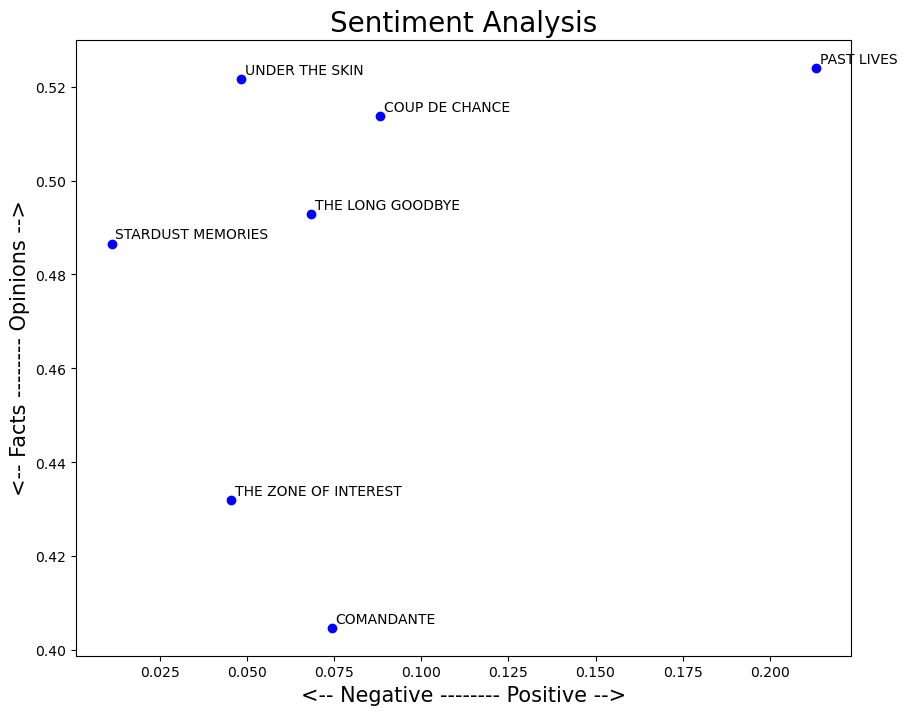

In [4]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, movie in enumerate(data.index):
    x = data.polarity.loc[movie]
    y = data.subjectivity.loc[movie]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, movie, fontsize=10)
    # plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [5]:
# Split each routine into 10 parts
import numpy as np
import math

# def split_text(text, n=10):
#     '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

#     # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
#     length = len(text)
#     size = math.floor(length / n)
#     start = np.arange(0, length, size)
    
#     # Pull out equally sized pieces of text and put it into a list
#     split_list = []
#     for piece in range(n):
#         split_list.append(text[start[piece]:start[piece]+size])
#     return split_list

In [6]:
for t in data.transcript:
    split = len(t.split())
    print(split)


691
1960
454
3645
3657
553
510


In [7]:
def divide_string_into_n_parts(input_string, n=10):
    # Split the input string into words
    words = input_string.split()

    # Count the total number of words
    total_words = len(words)

    # Calculate the number of words per part
    words_per_part = total_words // n
    remaining_words = total_words % n

    # Initialize variables
    start_index = 0
    parts = []

    # Loop through n parts
    for i in range(n):
        # Calculate the end index for this part
        end_index = start_index + words_per_part + (1 if i < remaining_words else 0)

        # Extract words for this part
        part = ' '.join(words[start_index:end_index])

        # Append the part to the list of parts
        parts.append(part)

        # Update the start index for the next part
        start_index = end_index

    return parts

# Example usage:
input_string = data.transcript[0]
n = 100
result = divide_string_into_n_parts(input_string, n)
print(result)

['movie reviews comandantedirected by edoardo de angelis', 'plot at the onset of world war', 'ii salvatore todaro captains the submarine cappellini', 'of the royal italian navy in october', 'while navigating the atlantic in the dead', 'of night he is attacked by a', 'belgian merchant ship in the brief but', 'violent battle todaro sinks the merchant ship', 'with cannon fire it is at this', 'juncture that following the law of the', 'sea and in defiance of his commands', 'orders he decides to save the belgian', 'shipwreck survivors doomed to drown in the', 'midst of the ocean in the introduction', 'to the novel written with director edoardo', 'de angelis based on their screenplay for', 'comandante sandro veronesi shares that the inspiration', 'for the films script dates back to', 'the summer of a period marked by', 'a resurgence of xenophobia fueled by the', 'increasing number of migrant landings fleeing detention', 'camps in libya in search of refuge', 'on the siciliancalabrian coasts it

In [8]:
# Let's take a look at our data again
data

,transcript,polarity,subjectivity
COMANDANTE,movie reviews comandantedirected by edoardo de...,0.074341,0.404809
COUP DE CHANCE,movie reviews a scene reminiscent of donizetti...,0.088230,0.513801
PAST LIVES,movie reviews nora and hae sung childhood frie...,0.213291,0.524012
STARDUST MEMORIES,pauline kael had a mixed response to woody all...,0.011086,0.486585
THE LONG GOODBYE,by pauline kael edmund wilson summed up raymon...,0.068386,0.492902
THE ZONE OF INTEREST,movie reviews jonathan glazers the zone of int...,0.045417,0.432067
UNDER THE SKIN,movie reviews by mauro gervasini jonathan glaz...,0.048385,0.521667


In [9]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = divide_string_into_n_parts(t)
    list_pieces.append(split)
    
list_pieces

[['movie reviews comandantedirected by edoardo de angelis plot at the onset of world war ii salvatore todaro captains the submarine cappellini of the royal italian navy in october while navigating the atlantic in the dead of night he is attacked by a belgian merchant ship in the brief but violent battle todaro sinks the merchant ship with cannon fire it is at this juncture that following the law of the',
  'sea and in defiance of his commands orders he decides to save the belgian shipwreck survivors doomed to drown in the midst of the ocean in the introduction to the novel written with director edoardo de angelis based on their screenplay for comandante sandro veronesi shares that the inspiration for the films script dates back to the summer of a period marked by a resurgence of xenophobia fueled by',
  'the increasing number of migrant landings fleeing detention camps in libya in search of refuge on the siciliancalabrian coasts it was then that through an article in avvenire featuring

In [10]:
# The list has 10 elements, one for each transcript
len(list_pieces)

7

In [11]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [12]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[-0.18333333333333335,
  0.05,
  0.08333333333333333,
  0.056666666666666664,
  0.0,
  0.20833333333333334,
  0.20833333333333331,
  -0.55,
  0.30999999999999994,
  0.11704545454545455],
 [0.06324561403508773,
  0.03125,
  0.15315151515151515,
  0.1431372549019608,
  -0.05588235294117645,
  0.075,
  -0.03148148148148148,
  0.06294642857142857,
  0.23524720893141945,
  0.1742822966507177],
 [0.22727272727272724,
  0.7916666666666666,
  -0.12222222222222223,
  0.3,
  0.25,
  0.42000000000000004,
  0.22916666666666669,
  0.10520833333333333,
  -0.011111111111111118,
  0.045],
 [-0.12552910052910055,
  0.03636363636363636,
  -0.011574074074074077,
  -0.010664682539682523,
  -0.07688492063492061,
  0.12628648233486944,
  -0.01323710073710075,
  0.03746448863636363,
  0.09619047619047623,
  0.06703169258724814],
 [0.08993995252059768,
  -0.009128607503607503,
  0.15120763075308527,
  0.188,
  0.09488505747126436,
  0.07871572871572871,
  0.07561274509803921,
  0.01576797385620915,
  0.00119

In [13]:
subjectivity_transcript = []
for lp in list_pieces:
    sub_piece = []
    for p in lp:
        sub_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(sub_piece)
    
subjectivity_transcript

[[0.3055555555555556,
  0.3,
  0.08333333333333333,
  0.6133333333333333,
  0.16666666666666666,
  0.3833333333333333,
  0.5,
  0.55,
  0.51,
  0.4568181818181818],
 [0.37447368421052635,
  0.540625,
  0.4405606060606061,
  0.5200980392156863,
  0.46111111111111114,
  0.6054166666666667,
  0.5592592592592593,
  0.5811755952380951,
  0.5756778309409888,
  0.4910287081339712],
 [0.45090909090909087,
  0.45,
  0.6666666666666666,
  0.5083333333333333,
  0.55,
  0.52,
  0.5854166666666667,
  0.5239583333333333,
  0.25555555555555554,
  0.625],
 [0.3720723104056437,
  0.4420454545454546,
  0.5308201058201057,
  0.449875992063492,
  0.6110367063492063,
  0.526331285202253,
  0.5147946647946647,
  0.3706628787878788,
  0.5340674603174603,
  0.4815734060178504],
 [0.47310291858678966,
  0.5498869047619046,
  0.36734452416270597,
  0.5244285714285714,
  0.5304022988505747,
  0.5499999999999999,
  0.41137254901960785,
  0.5494281045751633,
  0.49400793650793656,
  0.5007575757575757],
 [0.244444

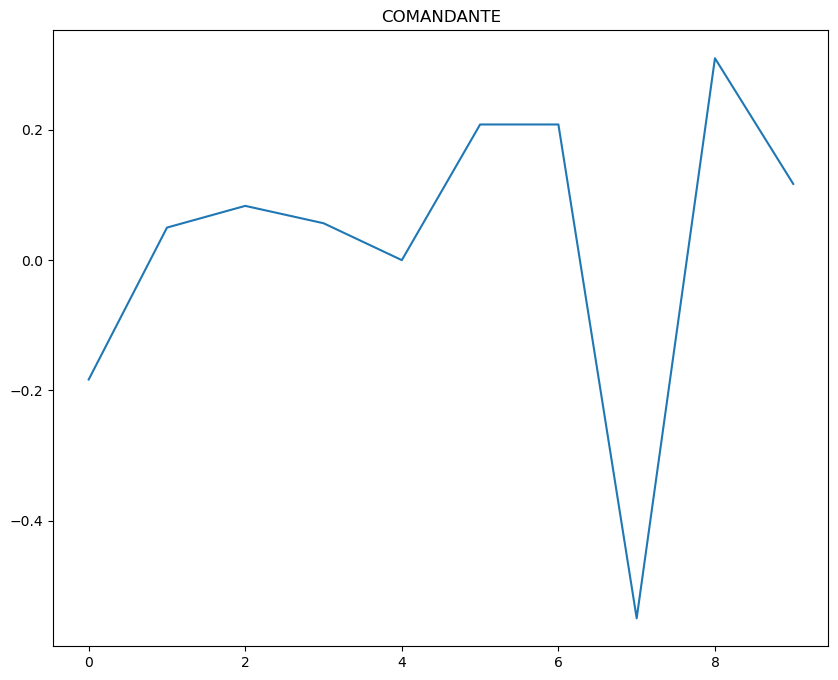

In [14]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data.index[0])
plt.show()

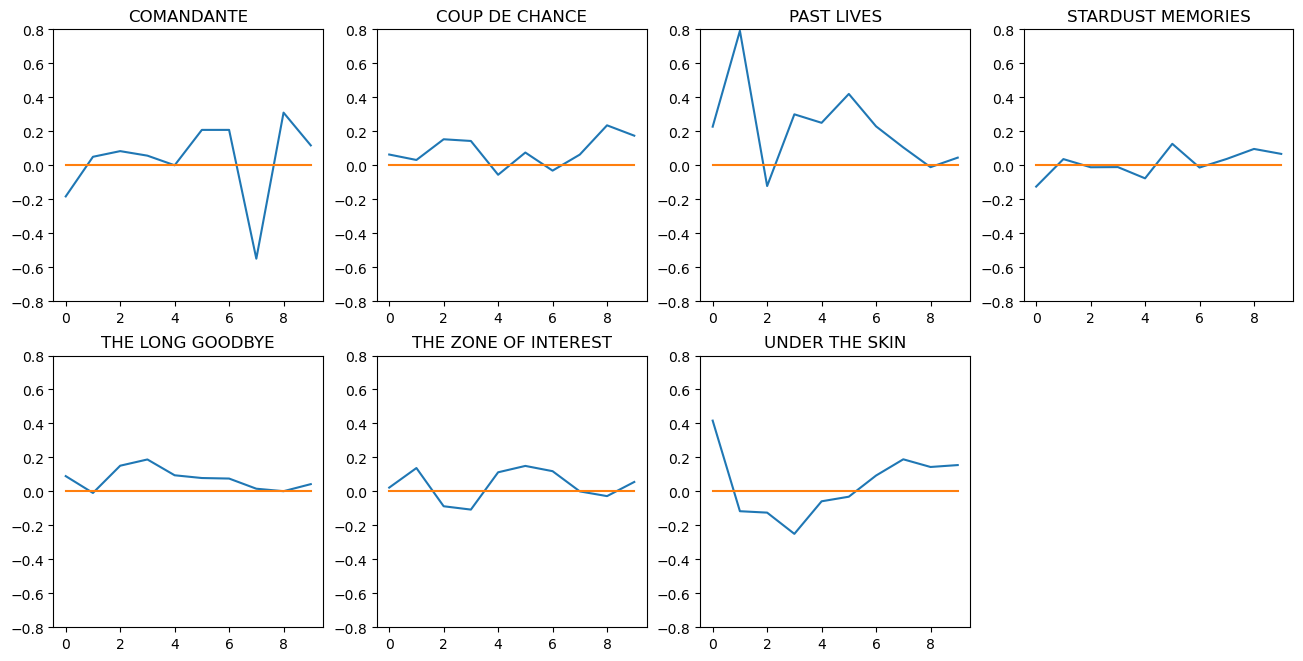

In [15]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, movie in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(movie)
    plt.ylim(ymin=-.8, ymax=.8)
    
plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [16]:
for i,trans in enumerate(data['transcript']):
  if (np.mean(polarity_transcript[i]))>0:
    print(f"{data.index[i]}:- Positive polarity\n")
  else:
    print(f"{data.index[i]}:- Negative polarity\n")

COMANDANTE:- Positive polarity

COUP DE CHANCE:- Positive polarity

PAST LIVES:- Positive polarity

STARDUST MEMORIES:- Positive polarity

THE LONG GOODBYE:- Positive polarity

THE ZONE OF INTEREST:- Positive polarity

UNDER THE SKIN:- Positive polarity



In [17]:
for i,trans in enumerate(data['transcript']):
  if (np.mean(subjectivity_transcript[i]))>0.5:
    print(f"{data.index[i]}:- Opinion\n");
  else:
    print(f"{data.index[i]}:- Fact\n");

COMANDANTE:- Fact

COUP DE CHANCE:- Opinion

PAST LIVES:- Opinion

STARDUST MEMORIES:- Fact

THE LONG GOODBYE:- Fact

THE ZONE OF INTEREST:- Fact

UNDER THE SKIN:- Opinion



In [89]:
list_pieces2 = []
for t in data.transcript:
    split = divide_string_into_n_parts(t,300)
    list_pieces2.append(split)    
list_pieces2

[['movie reviews comandantedirected',
  'by edoardo de',
  'angelis plot at',
  'the onset of',
  'world war ii',
  'salvatore todaro captains',
  'the submarine cappellini',
  'of the royal',
  'italian navy in',
  'october while navigating',
  'the atlantic in',
  'the dead of',
  'night he is',
  'attacked by a',
  'belgian merchant ship',
  'in the brief',
  'but violent battle',
  'todaro sinks the',
  'merchant ship with',
  'cannon fire it',
  'is at this',
  'juncture that following',
  'the law of',
  'the sea and',
  'in defiance of',
  'his commands orders',
  'he decides to',
  'save the belgian',
  'shipwreck survivors doomed',
  'to drown in',
  'the midst of',
  'the ocean in',
  'the introduction to',
  'the novel written',
  'with director edoardo',
  'de angelis based',
  'on their screenplay',
  'for comandante sandro',
  'veronesi shares that',
  'the inspiration for',
  'the films script',
  'dates back to',
  'the summer of',
  'a period marked',
  'by a resurgenc

In [90]:
len(list_pieces2)

7

In [91]:
len(list_pieces2[0])

300

In [92]:
# Calculate the polarity for each piece of text

polarity_transcript2 = []
for lp in list_pieces2:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript2.append(polarity_piece)
    
polarity_transcript2

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.2,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.8,
  -0.1,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.1,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.25,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.16666666666666666,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.575,
  0.0,
  0.0,
  0.0,
  -0.8,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.1,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0

In [93]:
subjectivity_transcript2 = []
for lp in list_pieces2:
    sub_piece = []
    for p in lp:
        sub_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript2.append(sub_piece)
    
subjectivity_transcript2

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.4,
  0.0,
  0.0,
  0.0,
  0.3333333333333333,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.1,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.6,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.25,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.16666666666666666,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.75,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.4,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.5,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
 

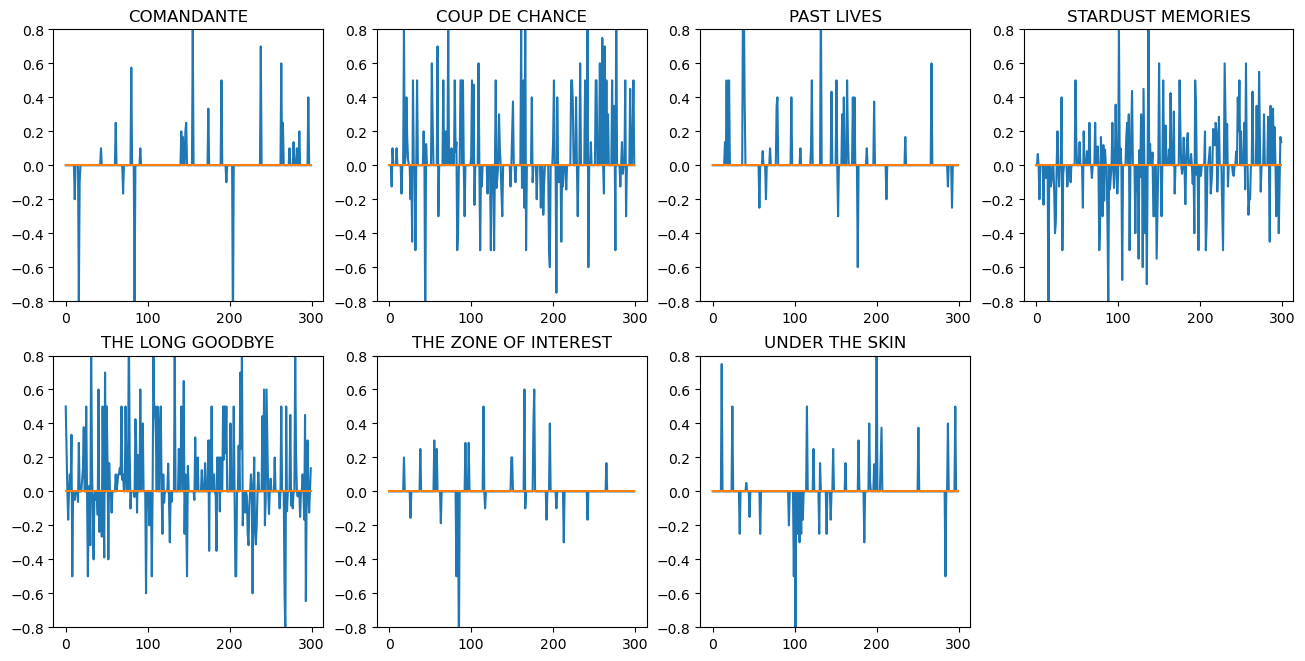

In [94]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, movie in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript2[index])
    plt.plot(np.arange(0,len(polarity_transcript2[0])), np.zeros(len(polarity_transcript2[0])))
    plt.title(movie)
    plt.ylim(ymin=-.8, ymax=.8)
    
plt.show()

In [95]:
for i,trans in enumerate(data['transcript']):
  if (np.mean(polarity_transcript2[i]))>0:
    print(f"{data.index[i]}:- Positive polarity\n");
  else:
    print(f"{data.index[i]}:- Negative polarity\n");

COMANDANTE:- Positive polarity

COUP DE CHANCE:- Positive polarity

PAST LIVES:- Positive polarity

STARDUST MEMORIES:- Positive polarity

THE LONG GOODBYE:- Positive polarity

THE ZONE OF INTEREST:- Positive polarity

UNDER THE SKIN:- Positive polarity



In [96]:
for i,trans in enumerate(data['transcript']):
  if (np.mean(subjectivity_transcript2[i]))>0.5:
    print(f"{data.index[i]}:- Opinion\n");
  else:
    print(f"{data.index[i]}:- Fact\n");

COMANDANTE:- Fact

COUP DE CHANCE:- Fact

PAST LIVES:- Fact

STARDUST MEMORIES:- Fact

THE LONG GOODBYE:- Fact

THE ZONE OF INTEREST:- Fact

UNDER THE SKIN:- Fact



The reviews are generally written with a postive point of view.<br>
Coup de chance, Stradust memories and the long goodbye have a varing sentiment over time.

As we increase the value of n, the transcripts appaear to be more Factual than Opinionated.